In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df['benign_0__mal_1'].head(1)

0    0
Name: benign_0__mal_1, dtype: int64

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

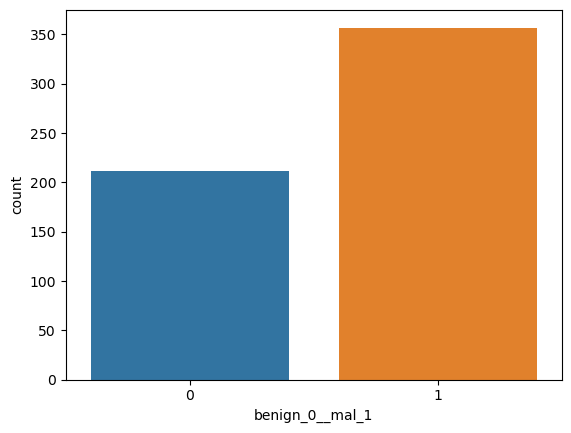

In [11]:
sns.countplot(x='benign_0__mal_1',data=df)

In [14]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

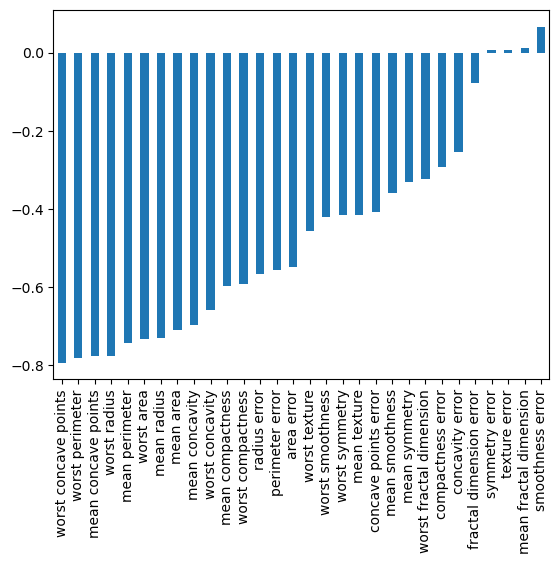

In [15]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

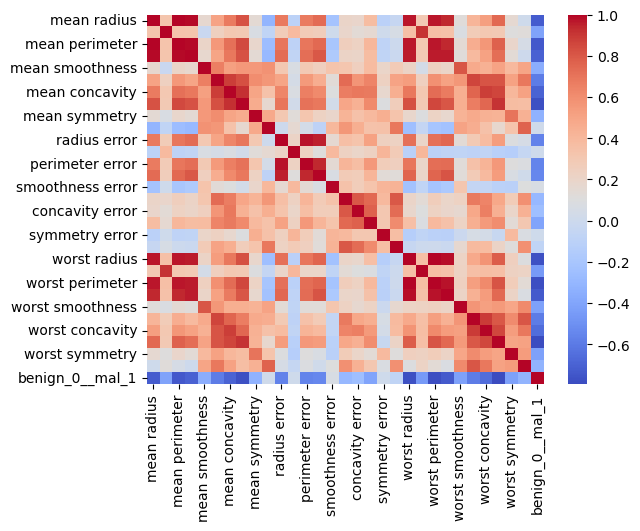

In [18]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
X= df.drop('benign_0__mal_1',axis=1).values
y= df['benign_0__mal_1'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler= MinMaxScaler()

In [26]:
X_train= scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [30]:
X_train.shape

(426, 30)

In [31]:
model= Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))


#BINARY CLASSIFICATION 
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [32]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6984 - val_loss: 0.6717
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6644 - val_loss: 0.6483
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6417 - val_loss: 0.6240
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6173 - val_loss: 0.5986
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5899 - val_loss: 0.5648
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5543 - val_loss: 0.5241
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5134 - val_loss: 0.4817
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4717 - val_loss: 0.4392
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4301 - val_loss: 0.3968
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3897 - val_loss: 0.3563
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0593 - val_loss: 0.1118
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0625 - val_loss: 0.1094
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0593 - val_loss: 0.1152
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0569 - val_loss: 0.1187
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0580 - val_loss: 0.1045
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0565 - val_loss: 0.1120
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0551 - val_loss: 0.1132
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0540 - val_loss: 0.1088
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0558 - val_loss: 0.1118
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0547 - val_loss: 0.1106
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0450 - val_loss: 0.1300
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0515 - val_loss: 0.1193
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0452 - val_loss: 0.1321
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0460 - val_loss: 0.1228
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0484 - val_loss: 0.1160
Epoch 169/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0449 - val_loss: 0.1410
Epoch 170/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0458 - val_loss: 0.1222
Epoch 171/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0441 - val_loss: 0.1252
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0427 - val_loss: 0.1294
Epoch 173/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0441 - val_loss: 0.1340
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0415 - val_loss: 0.1457
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.1277
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0440 - val_loss: 0.1515
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.1325
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.1272
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0404 - val_loss: 0.1348
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0379 - val_loss: 0.1328
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0381 - val_loss: 0.1419
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0356 - val_loss: 0.1293
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0352 - val_loss: 0.1260
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0355 - val_loss: 0.1449
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0346 - val_loss: 0.1352
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0348 - val_loss: 0.1350
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0331 - val_loss: 0.1491
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0334 - val_loss: 0.1430
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0327 - val_loss: 0.1409
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0318 - val_loss: 0.1396
Epoch 333/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0368 - val_loss: 0.1389
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0325 - val_loss: 0.1295
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0377 - val_loss: 0.1337
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0274 - val_loss: 0.1380
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0283 - val_loss: 0.1474
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0282 - val_loss: 0.1453
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0293 - val_loss: 0.1470
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.1448
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.1491
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0280 - val_loss: 0.1463
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0288 - val_loss: 0.1446
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.1415
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0274 - val_loss: 0.1615
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0257 - val_loss: 0.1722
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0279 - val_loss: 0.1698
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0256 - val_loss: 0.1670
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0243 - val_loss: 0.1538
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0248 - val_loss: 0.1621
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0253 - val_loss: 0.1470
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0252 - val_loss: 0.1730
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0283 - val_loss: 0.1649
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0258 - val_loss: 0.1503
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.1571
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0215 - val_loss: 0.1828
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.1747
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.1947
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0222 - val_loss: 0.1766
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0211 - val_loss: 0.1678
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.1770
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.1644
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.1844
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0239 - val_loss: 0.1817
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.1627
Epoc

In [33]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

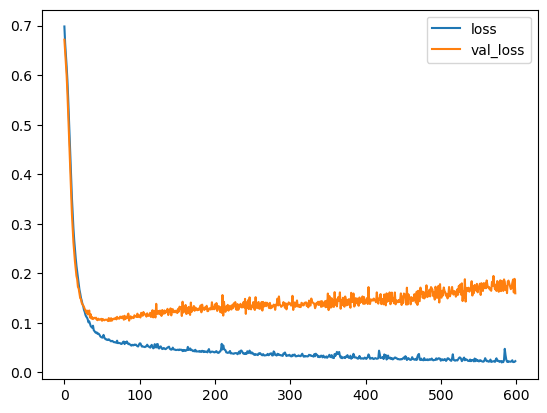

In [34]:
losses.plot()

In [35]:
#Going to stop training as the model is overfitting and
#I am going to retain the model using call backs


In [36]:
model= Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))


#BINARY CLASSIFICATION 
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [41]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6819 - val_loss: 0.6696
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6583 - val_loss: 0.6460
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6315 - val_loss: 0.6157
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5986 - val_loss: 0.5768
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5553 - val_loss: 0.5289
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5064 - val_loss: 0.4787
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4563 - val_loss: 0.4275
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4079 - val_loss: 0.3817
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3639 - val_loss: 0.3371
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3238 - val_loss: 0.2965
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0520 - val_loss: 0.0976
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0531 - val_loss: 0.0905
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0537 - val_loss: 0.0960
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0600 - val_loss: 0.1003
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0506 - val_loss: 0.0884
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0511 - val_loss: 0.0966
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0503 - val_loss: 0.0937
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0510 - val_loss: 0.0984
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0524 - val_loss: 0.1007
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.0967
Epoch 93/600


In [43]:
losses= pd.DataFrame(model.history.history)

<AxesSubplot:>

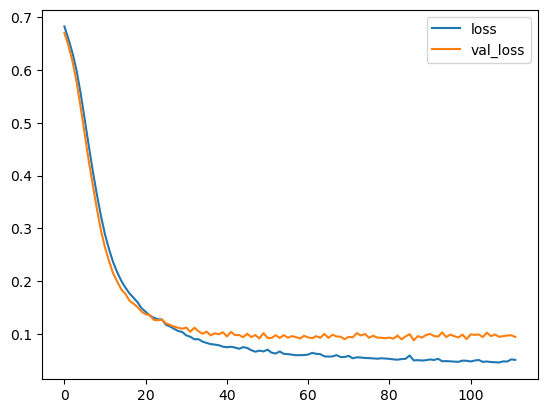

In [44]:
losses.plot()

In [45]:
#Using dropout

In [46]:
model= Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))


#BINARY CLASSIFICATION 
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [47]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.7157 - val_loss: 0.6754
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7095 - val_loss: 0.6517
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6680 - val_loss: 0.6306
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6607 - val_loss: 0.6112
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6357 - val_loss: 0.5904
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6245 - val_loss: 0.5648
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.5383
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5729 - val_loss: 0.5093
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5624 - val_loss: 0.4827
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5145 - val_loss: 0.4560
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0891 - val_loss: 0.1152
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1167 - val_loss: 0.1040
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1124 - val_loss: 0.1004
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1157 - val_loss: 0.1074
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1232 - val_loss: 0.0912
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1210 - val_loss: 0.0984
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1246 - val_loss: 0.1137
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1104 - val_loss: 0.1005
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1159 - val_loss: 0.1036
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 0.0963
Epoch 93/600


In [48]:
model_loss= pd.DataFrame(model.history.history)

<AxesSubplot:>

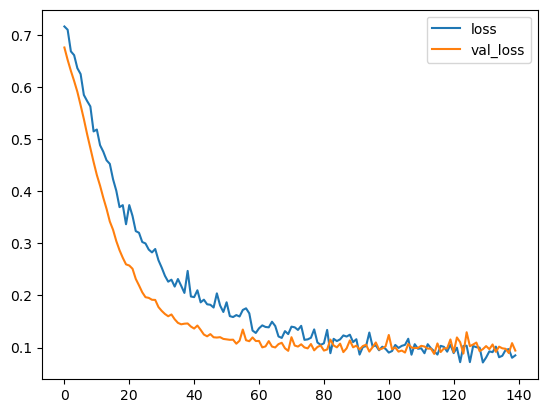

In [49]:
model_loss.plot()

In [63]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 1ms/step


In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [66]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
